<a href="https://colab.research.google.com/github/vishrutjai/CV_Project/blob/master/CV_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, Input, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import backend as K

import os
import cv2
import string

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from imutils import contours
import imutils

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# Reading Images

In [0]:
img = cv2.imread('samples/23n88.png')
#img1 = cv2.imread('https://github.com/vishrutjai/CV_Project/tree/master/samples/2b827.png')

# Drawing boundaries around the Captcha Text

In [8]:
img = cv2.rectangle(img, (10,8), (150,48), (0,0,255), 2)
cv2_imshow(img)

AttributeError: ignored

# Image Resizing

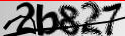

In [37]:
img = img[9:45, 15:140]
cv2_imshow(img)

# Noise Removal

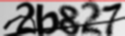

In [38]:
img = cv2.GaussianBlur(img, (5, 5), 0)

cv2_imshow(img)

In [0]:
# Segmentation
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Displaying segmented images
#display(original, thresh, 'Original', 'Segmented')

In [0]:
# Further noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

#Displaying segmented back ground
#display(original, sure_bg, 'Original', 'Segmented Background')

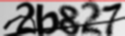

In [41]:
cv2_imshow(img)

In [0]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]

# Displaying markers on the image
#display(image, markers, 'Original', 'Marked')

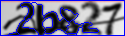

In [43]:
cv2_imshow(img)